In [1]:
import uproot
import matplotlib.pyplot as plt

import pandas as pd

# Open ROOT file
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run41-0_1192106.root")
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run50-0_79623.root")
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run60-0_73311.root")
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run70-0_63888.root")
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run83-0_74064.root")
# file = uproot.open("../ConvertGENIE/FASERMC-PO-Run130-0_1128453.root")
file = uproot.open("../ConvertGENIE/FASERMC-PO-Run201-0_260783.root")
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run140-0_1111473.root")
# LOS -10,-10
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run141-0_98351.root")
# LOS -20,20
#file = uproot.open("../ConvertGENIE/FASERMC-PO-Run142-0_70235.root")

# Access TTree
tree = file["POEvent"]

# Convert to Pandas DataFrame
df = tree.arrays(library="pd")

# Display DataFrame
print(df.head())


   fUniqueID  fBits  run_number  event_id  prim_vx.fCoordinates.fX  \
0          0      0         201         0               121.370814   
1          0      0         201         1               250.723167   
2          0      0         201         2              -464.458880   
3          0      0         201         3               230.327894   
4          0      0         201         4              -115.970609   

   prim_vx.fCoordinates.fY  prim_vx.fCoordinates.fZ  use_GENIE_vtx  \
0               -55.074031              4027.461762           True   
1                16.306567              3686.358325           True   
2               364.648499              3394.901430           True   
3              -172.486714              1514.508164           True   
4               459.805123              2777.780928           True   

   GENIE_vtx_name  vtx_target  ...   vis_spy      vis_spz     jetpx     jetpy  \
0            Fe56           0  ... -0.263328  1167.412460 -4.606706 -4.937130

In [2]:
df

,fUniqueID,fBits,run_number,event_id,prim_vx.fCoordinates.fX,prim_vx.fCoordinates.fY,prim_vx.fCoordinates.fZ,use_GENIE_vtx,GENIE_vtx_name,vtx_target,...,vis_spy,vis_spz,jetpx,jetpy,jetpz,tauvis_px,tauvis_py,tauvis_pz,Evis,ptmiss
0,0,0,201,0,121.370814,-55.074031,4027.461762,True,Fe56,0,...,-0.263328,1167.412460,-4.606706,-4.937130,1075.288874,0.0,0.0,0.0,1167.412507,0.330489
1,0,0,201,1,250.723167,16.306567,3686.358325,True,Fe56,0,...,1.785527,213.645031,-3.315171,1.785527,213.645031,0.0,0.0,0.0,213.678211,3.765431
2,0,0,201,2,-464.458880,364.648499,3394.901430,True,Fe56,0,...,0.383848,451.019481,-6.844772,1.579605,155.793091,0.0,0.0,0.0,451.020443,0.931176
3,0,0,201,3,230.327894,-172.486714,1514.508164,True,proton,0,...,-0.313397,884.029845,-1.229717,-5.098444,117.105186,0.0,0.0,0.0,884.030000,0.523568
4,0,0,201,4,-115.970609,459.805123,2777.780928,True,Fe56,0,...,-0.089111,290.237061,-1.010927,0.863884,188.182042,0.0,0.0,0.0,290.237075,0.090881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260778,0,0,201,260778,155.877389,-472.980328,2853.592241,True,Fe56,0,...,-0.410572,250.713057,4.418774,-1.361612,70.931403,0.0,0.0,0.0,250.713441,0.438454
260779,0,0,201,260779,96.600487,173.109067,2848.728172,True,Fe54,0,...,1.097897,1786.699585,2.594218,7.075976,372.217131,0.0,0.0,0.0,1786.700079,1.328892
260780,0,0,201,260780,71.963633,-0.812800,1703.744584,True,Fe56,0,...,-0.147638,2417.834349,-2.961009,6.021430,1665.621045,0.0,0.0,0.0,2417.834364,0.270411
260781,0,0,201,260781,16.125467,-397.545091,2739.388083,True,Fe56,0,...,-0.210543,176.290386,1.675729,-3.990180,61.731188,0.0,0.0,0.0,176.290531,0.226044


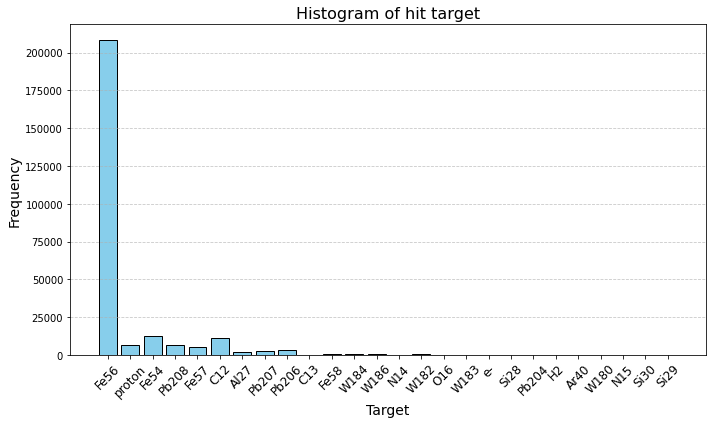

In [3]:
import awkward as ak
from collections import Counter

# Count occurrences of each value in GENIE_vtx_name
genie_vtx_flat = ak.to_list(df["GENIE_vtx_name"])
counts = Counter(genie_vtx_flat)

# Convert to lists for plotting
labels, values = zip(*counts.items())

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='skyblue', edgecolor='black')
plt.title('Histogram of hit target', fontsize=16)
plt.xlabel('Target', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

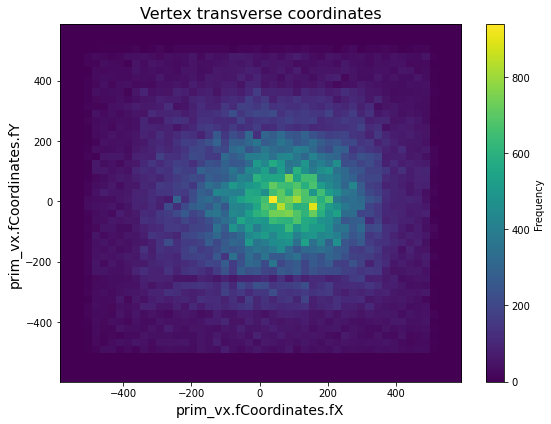

In [4]:
import numpy as np
# Create a 2D histogram of the data
x = df["prim_vx.fCoordinates.fX"]
y = df["prim_vx.fCoordinates.fY"]
hist, xedges, yedges = np.histogram2d(x, y, bins=(50, 50))

# Plot the 2D histogram with imshow
plt.figure(figsize=(8, 6))
plt.imshow(
    hist.T,  # Transpose to align correctly
    origin="lower",  # Ensure (0,0) is at the bottom-left
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],  # Define the range
    aspect="auto",  # Aspect ratio matches data
    cmap="viridis",  # Colormap
)

# Add color bar and labels
plt.colorbar(label="Frequency")
plt.title("Vertex transverse coordinates", fontsize=16)
plt.xlabel("prim_vx.fCoordinates.fX", fontsize=14)
plt.ylabel("prim_vx.fCoordinates.fY", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
x = df["prim_vx.fCoordinates.fX"]
y = df["prim_vx.fCoordinates.fY"]
xmin, xmax = -140-200, 140-200
ymin, ymax = -140+125, 140+125

# Apply the conditions
condition = (df["prim_vx.fCoordinates.fX"] > xmin) & (df["prim_vx.fCoordinates.fX"] < xmax) & \
            (df["prim_vx.fCoordinates.fY"] > ymin) & (df["prim_vx.fCoordinates.fY"] < ymax)

# Calculate the fraction
fraction = condition.sum() / len(df)

# Print the result
print(f"Fraction of rows within the specified range: {fraction:.4f}")


Fraction of rows within the specified range: 0.1034


In [6]:
condition.sum()

26974

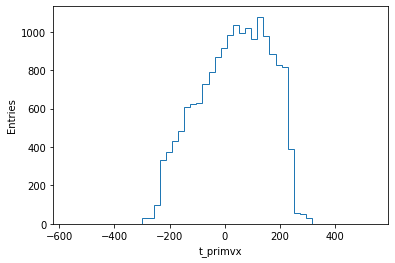

X mean: 32.14, std: 127.43
Y mean: -0.99, std: 124.91
Z mean: 143.98, std: 735.74


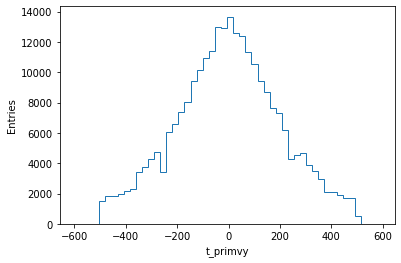

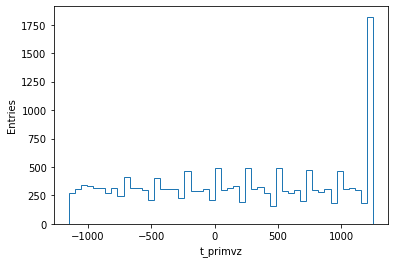

In [14]:
import numpy as np

df_filtered = df[(df["prim_vx.fCoordinates.fZ"] < 1250.0) & (df["prim_vx.fCoordinates.fZ"] > -1150.0)]

plt.hist(df_filtered["prim_vx.fCoordinates.fX"], bins=50, histtype='step')
plt.xlabel("t_primvx")
plt.ylabel("Entries")
plt.show()
# show mean and average of histograms
mean_x = df_filtered["prim_vx.fCoordinates.fX"].mean()
std_x = df_filtered["prim_vx.fCoordinates.fX"].std()
print(f"X mean: {mean_x:.2f}, std: {std_x:.2f}")

mean_y = df_filtered["prim_vx.fCoordinates.fY"].mean()
std_y = df_filtered["prim_vx.fCoordinates.fY"].std()
print(f"Y mean: {mean_y:.2f}, std: {std_y:.2f}")

mean_z = df_filtered["prim_vx.fCoordinates.fZ"].mean()
std_z = df_filtered["prim_vx.fCoordinates.fZ"].std()
print(f"Z mean: {mean_z:.2f}, std: {std_z:.2f}")
plt.hist(df["prim_vx.fCoordinates.fY"], bins=50, histtype='step')
plt.xlabel("t_primvy")
plt.ylabel("Entries")
plt.show()
plt.hist(df_filtered["prim_vx.fCoordinates.fZ"], bins=50, histtype='step')
plt.xlabel("t_primvz")
plt.ylabel("Entries")
plt.show()


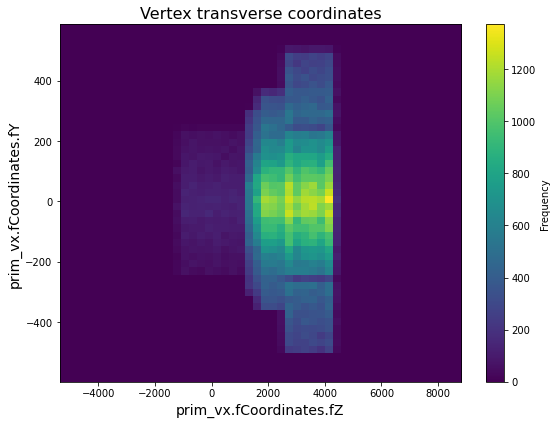

In [8]:
# Create a 2D histogram of the data
x = df["prim_vx.fCoordinates.fZ"]
y = df["prim_vx.fCoordinates.fY"]
hist, xedges, yedges = np.histogram2d(x, y, bins=(50, 50))

# Plot the 2D histogram with imshow
plt.figure(figsize=(8, 6))
plt.imshow(
    hist.T,  # Transpose to align correctly
    origin="lower",  # Ensure (0,0) is at the bottom-left
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],  # Define the range
    aspect="auto",  # Aspect ratio matches data
    cmap="viridis",  # Colormap
)

# Add color bar and labels
plt.colorbar(label="Frequency")
plt.title("Vertex transverse coordinates", fontsize=16)
plt.xlabel("prim_vx.fCoordinates.fZ", fontsize=14)
plt.ylabel("prim_vx.fCoordinates.fY", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()